<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM461/Particle_on_a_ring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # import numerical computation functions
import matplotlib.pyplot as plt # import plotting functions

#Particle on a Ring
We have already seen how we can numerically calculate the eigenfunctions and eigenvalues of particles in various types of boxes. These boxes have boundary conditions where at both ends of the box the eigenfunction either has to go to zero or the parts of the eigenfunctions inside and outside the box need to match up with each other at the boundary.

What would happen if we wrapped the one dimensional system around on itself and made the right-side of the box meet the left-side of the box forming a ring?

Here, as in the finite potential particle in a box, the wavefunction would need to be continuous such that at 0 and $2\pi$ the value of the wavefunction would match.



### Second order Differential
As [we saw previously](https://github.com/davis689/binder/blob/master/CHEM461/Numerical_solutions_to_Schrodinger_Equation.ipynb), a second derivative can be obtained with matrix multiplication using the matrix equation,
$$
\begin{pmatrix}f''_0 \\ f''_1 \\ f''_2 \\\vdots \\ f''_{N-1}\end{pmatrix} = \frac{1}{\Delta x^2}
\begin{pmatrix} -2 & 1 & 0 & 0 & \\ 1 & -2 & 1 & 0 & \\
0& 1 & -2 & 1 &  \\ &  & \ddots & \ddots & \ddots &\\
&  & & 1 & -2 \end{pmatrix}\begin{pmatrix}f_0 \\ f_1 \\ f_2 \\\vdots \\ f_{N-1}\end{pmatrix}=\begin{pmatrix}2f_0-f_1 \\ f_0-2f_1+f_2 \\ f_1-2f_2+f_3 \\\vdots \\ f_{N-2}-2f_{N-1}\end{pmatrix}
$$
The derivative matrix here has non-zero entries only on the diagonal and on the superdiagonal and subdiagonal one row above and below the diagonal.

In all cases so far, the first and last lines of this matrix are ignored because the second derivative method relies on evaluating the value of the function one point ahead and one point behind the position at which we are evaluating the derivative. Since there is no point behind the first point and no point ahead of the last point, the method fails at these points. That's OK because we just throw these points away and evaluate the derivative at the other $N$-2 points.

In the present case, we need to modify the derivative matrix to make clear that the point after the $(N-1)^{th}$ point (not the $N^{th}$ point since we're numbering starting with 0 which means the last point is point $N-1$) is the 0$^{th}$ point and the one before the $0^{th}$ point is the $(N-1)^{th}$ point. This means adding a 1 to the last entry in the first line of the derivative matrix as well as the last entry in the first column. Doing this means that multiplication of the first row with the eigenvector gives $f_{N-1}-2f_0+f_1$ and the last row multiplied by the eigenfunction gives $f_{N-2}-2f_{N-1}+f_0$.

# Solving the Particle in a Box Schrödinger Equation

We can now setup the Schrodinger Equation as a matrix equation:
$$
\hat H = \frac{\hbar^2}{2m}\frac{d^2}{d x^2} + V \\
\hat H \psi(x) = E \psi(x)
$$
We now know the matrix for taking the second order derivative. The matrix for the potential is simply the values of the potential on the diagonal of the matrix: $\mathbf{V}_{i=j} = V_i$. The result of multiplying the function vector will be to simply multiply each element of the function by the value of the potential.

Writing out the matrix for $\mathbf{H}$, including the two new off-diagonal elements to account for the connection between the sides of the box as we wrap it back on itself, we get:
$$
\mathbf{H} = \frac{-\hbar^2}{2 m \Delta x^2} \begin{pmatrix} -2 & 1 & 0 & 0 & &\mathbf{1}\\ 1 & -2 & 1 & 0 & &\\
0& 1 & -2 & 1 &  \\ &  & \ddots & \ddots & \ddots &&\\
\mathbf{1}&  && & 1 & -2 \end{pmatrix} +
\begin{pmatrix} V_0 & 0 & 0 & & \\ 0 & V_1 & 0 & & \\ 0 & 0 & V_2 & & \\ & & &\ddots & \\ &&&&V_{N-1}\end{pmatrix}
$$

It is worth looking at the matrix of the Hamiltonian and notice the symmetry: $\mathbf{H}^T = \mathbf{H}$, so the transpose of the matrix is identical to the matrix. Since the matrix is *real* everywhere, the complex conjugate is also the same: $\mathbf{H}^*=\mathbf{H}$. Combining these two statements, we can say that the Hamiltonian is Hermetian: $\mathbf{H}^\dagger = \mathbf{H}$.



In [ ]:
hbar=1 # use atomic units
m=1 # electron mass
r=1

N = 1000
phi = np.linspace(0.,np.pi*2.,N)

Δx = 2*np.pi/N # This is the difference between points.



Now we set up the potential energy, the second derivative operator, and the Hamiltonian. Then extract the eigenvalues and eigenfunctions.

In [38]:
V = 0.*phi # could be just zero but put x here to show that it is a function of x.
D2 = 1./(Δphi**2)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1)+np.diag(np.ones(1),N-1)+np.diag(np.ones(1),-N+1)) # derivative operator
H = -(hbar*hbar)/(2.0*m*r**2)*D2 + np.diag(V)  # Hamiltonian including derivative and potential energy.


E,psiT = np.linalg.eigh(H) # This computes the eigenvalues and eigenvectors
psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]

In [39]:
D2

array([[-50660.59182117,  25330.29591058,      0.        , ...,
             0.        ,      0.        ,  25330.29591058],
       [ 25330.29591058, -50660.59182117,  25330.29591058, ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,  25330.29591058, -50660.59182117, ...,
             0.        ,      0.        ,      0.        ],
       ...,
       [     0.        ,      0.        ,      0.        , ...,
        -50660.59182117,  25330.29591058,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
         25330.29591058, -50660.59182117,  25330.29591058],
       [ 25330.29591058,      0.        ,      0.        , ...,
             0.        ,  25330.29591058, -50660.59182117]])

The energies are stored in $E$. The first $N$ levels are calculated. We will focus on only a few of them. Let's list the first several in atomic energy units.

In [25]:
for i in range(20):
  print("E_{}={:8.3f}".format(i+1,E[i])) # the notation here is strange. Basically we will print everything between the ""
                                         #but stuff between the brackets will get subsitututed in from the between the parentheses in .format()
                                         #So here we'll print i+1 which is the quantum number 'n' in the particle in a box and the energies.
                                         #The :8.3f stuff indicates how many places to use for the whole number (some may be spaces) and how many for the
                                         #after the decimal point. The 'f' indicates a floating point (or decimal number). If we don't care about the
                                         #format of the number that is displayed or if the number is a whole number as it is, like 'i', just {} is fine.

E_1=   0.000
E_2=   0.499
E_3=   0.499
E_4=   1.996
E_5=   1.996
E_6=   4.491
E_7=   4.491
E_8=   7.984
E_9=   7.984
E_10=  12.474
E_11=  12.474
E_12=  17.962
E_13=  17.962
E_14=  24.447
E_15=  24.447
E_16=  31.929
E_17=  31.929
E_18=  40.408
E_19=  40.408
E_20=  49.884
E_21=  49.884
E_22=  60.355
E_23=  60.355
E_24=  71.822
E_25=  71.822
E_26=  84.284
E_27=  84.284
E_28=  97.741
E_29=  97.741
E_30= 112.192
E_31= 112.192
E_32= 127.637
E_33= 127.637
E_34= 144.074
E_35= 144.074
E_36= 161.504
E_37= 161.504
E_38= 179.925
E_39= 179.925
E_40= 199.338
E_41= 199.338
E_42= 219.740
E_43= 219.740
E_44= 241.132
E_45= 241.132
E_46= 263.512
E_47= 263.512
E_48= 286.880
E_49= 286.880
E_50= 311.235


####Scaling the energies
The energy of the lowest level in a particle in a box is $\frac{n^2 \hbar^2 \pi^2}{2 m a^2}$. For convenience we will rescale the energies to be relative to the energy of the first level. So $\epsilon=\frac{E_n}{E_1}=\frac{E_n}{\frac{\hbar^2 \pi^2}{2ma^2}}=\frac{E_n}{\frac{\pi^2}{2}}=\frac{2E_n}{\pi^2}$ and $ϵ=\frac{E_n}{\frac{\hbar^2 \pi^2}{2ma^2}}=\dfrac{\frac{n^2 \hbar^2 \pi^2}{2ma^2}}{\frac{\hbar^2 \pi^2}{2ma^2}}=n^2$. So we can rescale the energy by dividing by $\pi^2/2$ and the resulting value should be the quantum number squared. This makes it easy to see at a glance how close our numerical approximate answer is the analytical answer.

In [30]:
ϵ=[E[i]/(hbar**2/(2*m*r**2)) for i in range(50)] # we only need divide by 1/2 but hbar, m, and r are set equal to 1 so...
for i in range(20):
  print("ϵ_{}={:>8.3f}".format(i+1,ϵ[i]))

ϵ_1=   0.000
ϵ_2=   0.998
ϵ_3=   0.998
ϵ_4=   3.992
ϵ_5=   3.992
ϵ_6=   8.982
ϵ_7=   8.982
ϵ_8=  15.967
ϵ_9=  15.967
ϵ_10=  24.948
ϵ_11=  24.948
ϵ_12=  35.924
ϵ_13=  35.924
ϵ_14=  48.894
ϵ_15=  48.894
ϵ_16=  63.859
ϵ_17=  63.859
ϵ_18=  80.817
ϵ_19=  80.817
ϵ_20=  99.767
ϵ_21=  99.767
ϵ_22= 120.710
ϵ_23= 120.710
ϵ_24= 143.644
ϵ_25= 143.644
ϵ_26= 168.568
ϵ_27= 168.568
ϵ_28= 195.482
ϵ_29= 195.482
ϵ_30= 224.384
ϵ_31= 224.384
ϵ_32= 255.273
ϵ_33= 255.273
ϵ_34= 288.148
ϵ_35= 288.148
ϵ_36= 323.008
ϵ_37= 323.008
ϵ_38= 359.851
ϵ_39= 359.851
ϵ_40= 398.675
ϵ_41= 398.675
ϵ_42= 439.480
ϵ_43= 439.480
ϵ_44= 482.264
ϵ_45= 482.264
ϵ_46= 527.024
ϵ_47= 527.024
ϵ_48= 573.760
ϵ_49= 573.760
ϵ_50= 622.469


Our calculation gives almost what we expect. Each energy is essentially $m^2$ as it should be. If you change $N$ above and re-run the cells, you can see what affect using fewer (or more) points will have on runtime and accuracy. Try N=100 and N=5000. Remember that our calculation uses an N by N matrix so N=5000 will have to deal with a 25,000,000 element matrix.

In [83]:
norm=[np.sqrt(1/np.trapz(np.conj(psi[i])*psi[i],phi)) for i in range(50)] # calculate normalization for each eigenfunction
psi_norm=[psi[i]*norm[i] for i in range(50)] # normalize psi

We'll set up a mechanism to plot a bunch of wavefunctions at the same time.

The sign of the wavefunctions as we approach the ends is arbitrary. We can make it consistent if we want. The $for$ loop below plots each wavefunction but it also makes it so that the left end points all approach zero from above. The right end points then alternate.

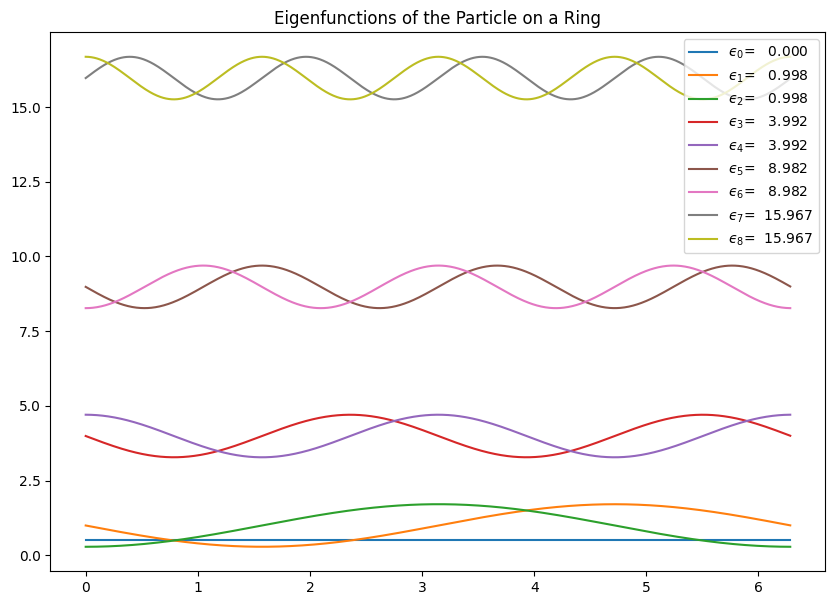

In [84]:
plt.figure(figsize=(10,7))
fact=0.1 # scale for plotting
nl=9
for i in range(0,nl): # start with i=1 and go to i=
      plt.plot(phi,psi_norm[i]/np.sqrt(Δx)*fact+ϵ[i],label="$ϵ_{}$={:>8.3f}".format(i,ϵ[i]))
plt.title("Eigenfunctions of the Particle on a Ring")
plt.legend()
plt.savefig("Infinite_Square_Well_WaveFunctions.pdf")
plt.show()

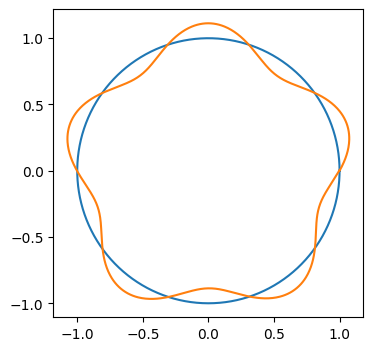

In [94]:
plt.figure(figsize=(4,4))
r=1
ef=9
scale=.2
x=r*np.cos(phi)
y=r*np.sin(phi)
xpsi=(r+psi_norm[ef]*scale)*np.cos(phi)
ypsi=(r+psi_norm[ef]*scale)*np.sin(phi)
plt.plot(x,y)
plt.plot(xpsi,ypsi)
plt.show()

We now also want to check that the energy levels do indeed correspond to the known levels:
$$
E_n = \frac{m^2 \hbar^2}{2 m r^2}
$$

In [ ]:
for i in range(nl):
    n = i+1
    print("ϵ[{}] = {:9.4f},     ϵ_{} ={:9.4f},      %deviation={:>8.4f}%".format(n,ϵ[i],n, n*n,((ϵ[i]-n*n)/n/n)))

A final test shows the accuracy of our calculation in the orthonormality of the states:

In [ ]:
np.trapz(psi_norm[1]**2,x) # check that it works for one psi

1.0

The code above checks the normalization of the n=2 eigenfunctions. We can check the orthonormality of a range of levels using the following lines.

In [ ]:
for j in range(nl):
    for i in range(nl):
        print("ψ_{}, ψ_{}, {:2.2f}".format(i+1,j+1,np.trapz(psi_norm[i]*psi_norm[j],x)))

Explain the results in terms of orthonormality.

